# LDA topic Modelling and K-means clustering to cluster similar set of documents

In [3]:
%store -r finalDocumentSet

In [4]:
print(len(finalDocumentSet))

88


In [5]:
import numpy as np

In [6]:
import numpy as np
import pandas as pd
import re, nltk, spacy, gensim
# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline


In [7]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [8]:
!python -m spacy download en

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
[x] Couldn't link model to 'en'
Creating a symlink in spacy/data failed. Make sure you have the required
permissions and try re-running the command as admin, or use a virtualenv. You
can still import the model as a module and call its load() method, or create the
symlink manually.
F:\python\lib\site-packages\en_core_web_sm -->
F:\python\lib\site-packages\spacy\data\en
[!] Download successful but linking failed
Creating a shortcut link for 'en' didn't work (maybe you don't have admin
permissions?), but you can still load the model via its full package name: nlp =
spacy.load('en_core_web_sm')


You should consider upgrading via the 'python -m pip install --upgrade pip' command.
You do not have sufficient privilege to perform this operation.


In [9]:
nlp = spacy.load('en_core_web_sm')

In [10]:
%store -r cleanDocx

In [11]:
print(len(cleanDocx))

88


In [12]:
%store -r dfObj1

In [13]:
dfObj1

,0,1,2,3,4
0,['health planners and policy-makers face compl...,the characteristics of healthcare systemsare c...,"thereis signiﬁcant variation in policy, fundin...",understanding these diﬀerencesand how they imp...,"healthcare systems involveandchange,constantva..."
1,['knowledge organization (ko) (also termed inf...,informationretrieval (ir) is another research ...,doi: 10.1002/asi.23250lis and (today overwhelm...,they shouldtherefore be seen as competing ﬁeld...,the difﬁculty of achievingcoherence may be cau...
2,['searching broad topic areas raises particula...,"for example,community engagement interventions...",such breadth demands thatreviewers familiarise...,ofvaried disciplines.,"also, searching broadly requires the location ..."
3,[' systematic reviews seek to answer spec...,"they are used to compare treatments, diagnosti...","while all stages are resource-intensive, ...",this is especially challenging in public ...,"furthermore, the definitions of interventions ..."
4,[': systematic reviews may provide less biased...,"hence, for clinical research questions, system...",it would be important to evaluate the prevalen...,researchers and clinicians give great value to...,this study sought to evaluate the prevalence a...
...,...,...,...,...,...
83,['the web has introduced many new ways in whic...,these two activities seem to have beenseparate...,"doi: 10.1002/asi.23236social network sites, su...",the sites academia.edu and researchgate nowcom...,"according to alexa.com,both sites were moderat..."
84,[': meta-research studies investigating method...,this study demonstrates the use of an economic...,incremental cost-effectiveness ratios (icers) ...,resource useand effect parameters were estimat...,unit cost parameters were estimated based on t...
85,[' to systematic reviews.london: sage; 2012.go...,syst rev.,2012;1(28): doi:10.1186/2046-4053-1-28.chalmer...,evalhealth prof. 2002;25:12–37.5.,mulrow c. rationale for systematic reviews.
86,"['*correspondence to: b. wettermark, centre fo...",e-mail: bjorn.wettermark@ki.se†for the nordic ...,the aim of this review is to present an overvi...,relevant studies wereanalyzed in terms of phar...,"of these, 262 were conducted in denmark, 97 in..."


In [14]:
data = dfObj1.values.tolist()

In [15]:
print(data)

[["['health planners and policy-makers face complex decisions requiringa deep knowledge of ‘healthcare systems’, which consist of all the or-ganizations, people and actions involved in maintaining, restoring andenhancing human well-being.", 'the characteristics of healthcare systemsare considered as an important indicator of population health (e.g.,quality of life for people in developing integrated smart systems forcities or regions) (ismagilova, hughes, dwivedi, & raman, 2019).', 'thereis signiﬁcant variation in policy, funding and delivery of health careacross regions (griﬃn et al., 2016).', 'understanding these diﬀerencesand how they impact on the health of communities requires reliableevidence, and health planners can use this evidence to drive systematicquality improvement of regional healthcare delivery.the growing availability of healthcare data raises the prospect ofbetter evidence-informed decision-making.', 'healthcare systems involveandchange,constantvariabilitycomplex inte

In [16]:
print(len(data))

88


In [17]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations


In [18]:
data_words = list(sent_to_words(data))
print(data_words[:1])

[['health', 'planners', 'and', 'policy', 'makers', 'face', 'complex', 'decisions', 'requiringa', 'deep', 'knowledge', 'of', 'healthcare', 'systems', 'which', 'consist', 'of', 'all', 'the', 'or', 'ganizations', 'people', 'and', 'actions', 'involved', 'in', 'maintaining', 'restoring', 'andenhancing', 'human', 'well', 'being', 'the', 'characteristics', 'of', 'healthcare', 'systemsare', 'considered', 'as', 'an', 'important', 'indicator', 'of', 'population', 'health', 'quality', 'of', 'life', 'for', 'people', 'in', 'developing', 'integrated', 'smart', 'systems', 'forcities', 'or', 'regions', 'ismagilova', 'hughes', 'dwivedi', 'raman', 'thereis', 'signiﬁcant', 'variation', 'in', 'policy', 'funding', 'and', 'delivery', 'of', 'health', 'careacross', 'regions', 'griﬃn', 'et', 'al', 'understanding', 'these', 'diﬀerencesand', 'how', 'they', 'impact', 'on', 'the', 'health', 'of', 'communities', 'requires', 'and', 'health', 'planners', 'can', 'use', 'this', 'evidence', 'to', 'drive', 'improvement',

In [19]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']): #'NOUN', 'ADJ', 'VERB', 'ADV'
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

In [20]:
# Do lemmatization keeping only Noun, Adj, Verb, Adverb
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'VERB']) #select noun and verb
print(data_lemmatized[:2])


['health planner policy maker face decision requiringa knowledge healthcare system consist ganization people action involve maintain restore andenhance human characteristic consider indicator population quality life people develop system forcitie region signiﬁcant variation policy funding delivery health region understand diﬀerencesand impact health community require health planner can use evidence drive improvement healthcare delivery grow availability raise prospect ofbetter evidence decision make healthcare system interaction structure process outcome andagent', 'term research library science concern otherthing index optimiza tion record bibliography catalog database research locate bothreceive revise accept asis publish library com today science ﬁeld objective tomake document information retrievable shouldtherefore see compete ﬁeld weakness should examine examination inﬂuence idea technique andhave research tradition difﬁculty may cause part fragment nature research dition describe

In [21]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,
# minimum reqd occurences of a word 
                             stop_words='english',             
# remove stop words
                             lowercase=True,                   
# convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  )
# num chars > 3
                             # max_features=50000,             
# max number of uniq words    )
data_vectorized = vectorizer.fit_transform(data_lemmatized)

In [33]:
# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=10,               # Number of topics
                                      max_iter=10,               
# Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          
# Random state
                                      batch_size=128,            
# n docs in each learning iter
                                      evaluate_every = -1,       
# compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               
# Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)
print(lda_model)  # Model attributes


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=-1,
                          perp_tol=0.1, random_state=100, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)


In [34]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized))
# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))
# See model parameters
pprint(lda_model.get_params())

Log Likelihood:  -9816.239643380679
Perplexity:  80.6476193582086
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 10,
 'n_jobs': -1,
 'perp_tol': 0.1,
 'random_state': 100,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


In [35]:
# Define Search Param
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}
# Init the Model
lda = LatentDirichletAllocation(max_iter=5, learning_method='online', learning_offset=50.,random_state=0)
# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)
# Do the Grid Search
model.fit(data_vectorized)


GridSearchCV(cv=None, error_score=nan,
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='online',
                                                 learning_offset=50.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=5,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1, random_state=0,
                                                 topic_word_prior=None,
                                                 total_samples=1000000.0,
                               

In [36]:
# Best Model
best_lda_model = model.best_estimator_
# Model Parameters
print("Best Model's Params: ", model.best_params_)
# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)
# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))


Best Model's Params:  {'learning_decay': 0.5, 'n_components': 10}
Best Log Likelihood Score:  -2766.174189825252
Model Perplexity:  91.08971384003314


In [37]:
# Create Document — Topic Matrix
lda_output = best_lda_model.transform(data_vectorized)
# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]
# index names

print(len(data))
docnames = ["Doc" + str(i) for i in range(len(data))]
# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic
# Styling
def color_green(val):
 color = 'green' if val > .1 else 'black'
 return 'color: {col}'.format(col=color)
def make_bold(val):
 weight = 700 if val > .1 else 400
 return 'font-weight: {weight}'.format(weight=weight)
# Apply Style
df_document_topics = df_document_topic.head(88).style.applymap(color_green).applymap(make_bold)
df_document_topics

88


,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Doc0,0.01,0.01,0.01,0.95,0.01,0.01,0.01,0.01,0.01,0.01,3
Doc1,0.91,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0
Doc2,0.94,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0
Doc3,0.32,0,0,0.67,0,0,0,0,0,0,3
Doc4,0.95,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0
Doc5,0.01,0.01,0.01,0.92,0.01,0.01,0.01,0.01,0.01,0.01,3
Doc6,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.95,0.01,0.01,7
Doc7,0.94,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0
Doc8,0.4,0,0,0,0,0,0.57,0,0,0,6
Doc9,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.94,0.01,0.01,7


In [38]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)
# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames
# View
df_topic_keywords.head(10)

,access,address,aim,analysis,approach,article,assess,author,base,care,...,technology,term,text,time,topic,trial,type,use,work,year
Topic0,2.786985,1.391916,4.714055,4.172504,2.351662,7.598039,4.772178,8.951033,6.228831,4.306526,...,3.952652,9.660470,12.955631,7.590499,3.653779,4.020891,18.201602,20.469687,11.741041,1.120888
Topic1,0.559141,1.482515,0.561226,2.025236,0.478002,0.545005,1.013679,0.912887,0.586420,1.023787,...,0.548861,0.565825,0.521932,1.008245,0.740853,2.087504,1.053543,0.587095,0.565584,1.084558
Topic2,0.456684,1.138008,0.886841,0.603807,0.519522,0.770592,1.464945,0.610668,0.865390,0.547082,...,1.113764,0.527894,0.613717,0.967624,0.476456,0.647873,0.516444,4.528755,1.054086,0.852766
Topic3,3.495545,1.148325,2.064329,8.405836,4.101755,3.202657,1.524676,2.420092,13.435452,10.290983,...,0.764346,4.326628,2.840215,2.682211,1.665610,2.488821,1.888664,14.610585,2.550148,2.993205
Topic4,0.619689,0.616262,0.452496,0.487099,0.539879,0.487112,0.423960,0.570644,0.900127,0.609104,...,0.510812,0.485797,0.540381,0.601710,0.674236,0.657053,0.482304,0.812317,0.524805,0.619823
Topic5,0.425947,0.539082,0.550008,0.510783,0.484564,0.485139,0.470520,0.507196,0.497949,0.438932,...,0.523417,0.529160,0.504842,0.529261,0.485749,0.537494,0.525453,0.513271,0.602848,0.553538
Topic6,0.551342,0.613120,0.466305,0.526268,0.493012,0.525857,0.486719,1.537820,0.531807,0.478708,...,4.102945,0.488556,1.278330,0.461891,0.496392,0.545983,0.537372,0.675727,0.551726,0.929127
Topic7,1.137719,2.561770,0.683381,1.067671,1.043405,2.182967,1.146541,3.842918,2.197193,1.453842,...,1.031010,1.595815,2.047343,1.307136,0.570963,2.090170,0.826835,6.810764,2.370121,0.526252
Topic8,1.475290,0.583404,0.597326,0.500235,0.494731,1.327732,0.566180,3.147492,1.160064,0.668899,...,1.724804,0.530874,0.546617,1.733839,0.458093,3.266951,0.688401,1.619916,1.588822,1.683573
Topic9,0.535857,0.596004,1.069505,2.208206,4.456347,0.499031,0.608694,0.680578,2.174577,1.097490,...,0.548678,0.632584,2.166399,1.430485,2.669029,0.626140,1.054733,2.818887,0.532987,1.129836


In [39]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords
topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=15)
# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,study,review,research,use,search,evidence,type,result,make,method,text,literature,publish,work,include
Topic 1,outcome,study,case,research,trial,analysis,intervention,require,knowledge,improve,right,reserve,address,researcher,report
Topic 2,research,use,design,policy,study,conduct,provide,assess,process,address,case,technology,identify,quality,work
Topic 3,review,study,health,use,base,search,evidence,care,risk,result,analysis,literature,method,support,strategy
Topic 4,review,evidence,base,use,result,practice,search,decision,provide,study,topic,trial,outcome,make,synthesis
Topic 5,receive,effect,screening,work,decision,intervention,increase,database,knowledge,provide,support,method,search,publish,require
Topic 6,technology,information,knowledge,author,make,text,researcher,resource,com,year,health,datum,mining,literature,search
Topic 7,process,use,citation,include,review,decision,author,mining,screening,model,case,identify,improve,strategy,method
Topic 8,publish,trial,review,author,datum,study,identify,literature,number,health,policy,evidence,search,provide,time
Topic 9,study,screening,datum,process,approach,use,method,topic,knowledge,identify,increase,analysis,base,text,number


In [40]:
# Construct the k-means clusters
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=5, random_state=100).fit_predict(lda_output)
# Build the Singular Value Decomposition(SVD) model
svd_model = TruncatedSVD(n_components=2)  # 2 components
lda_output_svd = svd_model.fit_transform(lda_output)
# X and Y axes of the plot using SVD decomposition
x = lda_output_svd[:, 0]
y = lda_output_svd[:, 1]
# Weights for the 15 columns of lda_output, for each component
print("Component's weights: \n", np.round(svd_model.components_, 2))
# Percentage of total information in 'lda_output' explained by the two components
print("Perc of Variance Explained: \n", np.round(svd_model.explained_variance_ratio_, 2))

Component's weights: 
 [[ 0.98  0.01  0.02  0.21  0.01  0.01  0.02  0.05  0.02  0.02]
 [-0.21  0.    0.01  0.98  0.    0.    0.    0.03  0.02  0.02]]
Perc of Variance Explained: 
 [0.24 0.32]


In [42]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Text(0.5, 1.0, 'Segregation of Topic Clusters')

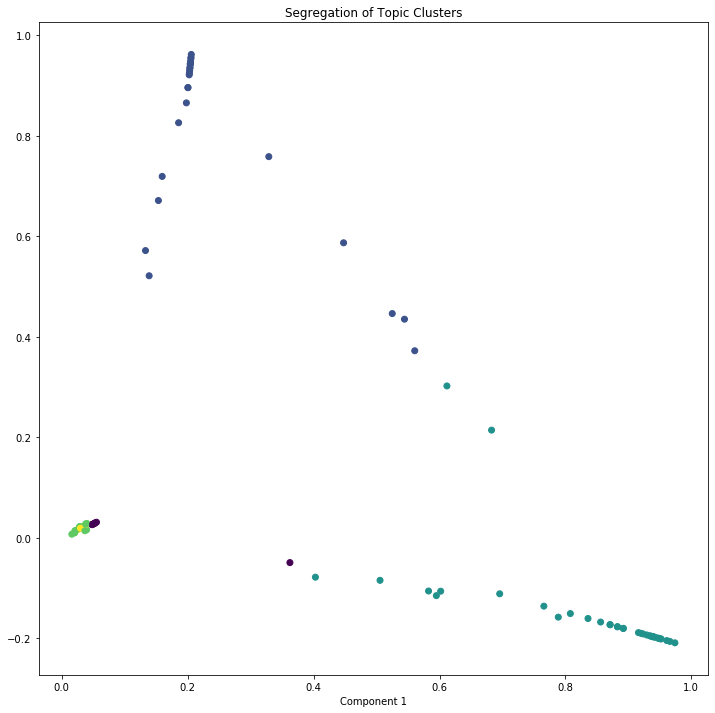

In [133]:
# Plot
plt.figure(figsize=(12, 12))
plt.scatter(x, y, c=clusters)
plt.xlabel('Component 2')
plt.xlabel('Component 1')
plt.title("Segregation of Topic Clusters", )


In [127]:
# Define function to predict topic for a given text document.
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
def predict_topic(text, nlp=nlp):
    global sent_to_words
    global lemmatization
# Step 1: Clean with simple_preprocess
    mytext_2 = list(sent_to_words(text))
# Step 2: Lemmatize
    mytext_3 = lemmatization(mytext_2, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# Step 3: Vectorize transform
    mytext_4 = vectorizer.transform(mytext_3)
# Step 4: LDA Transform
    topic_probability_scores = best_lda_model.transform(mytext_4)
    topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), 1:14].values.tolist()
    
    # Step 5: Infer Topic
    infer_topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), -1]
    
    #topic_guess = df_topic_keywords.iloc[np.argmax(topic_probability_scores), Topics]
    return infer_topic, topic, topic_probability_scores
# Predict the topic
mytext = ["Very Useful in diabetes age 30. I need control sugar. thanks Good deal"]
infer_topic, topic, prob_scores = predict_topic(text = mytext)
print(topic)
print(infer_topic)

['review', 'research', 'use', 'search', 'evidence', 'type', 'result', 'make', 'method', 'text', 'literature', 'publish', 'work']
include
